# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset
df = pd.read_csv(r"C:\Users\veena\Downloads\archive (2)\Restaurant_Reviews.tsv",delimiter = '\t', quoting = 3)

In [6]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


<Axes: xlabel='Liked', ylabel='count'>

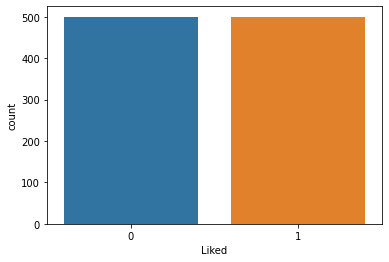

In [7]:
sns.countplot(x = df['Liked'])

In [31]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\veena\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Preprocessing

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

In [9]:
# Text preprocessing and TF-IDF vectorization
stemmer = SnowballStemmer('english')
corpus = []
for i in range(len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    review = review.lower()
    review = review.split()
    review = [stemmer.stem(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

# Model1:Using GaussianNB

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
# max_features keeps most frequent words and removes least frequent words (extra cleaning)
# max_feature reduces sparsity, increases precision, better learning and hence better prediction.
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [22]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[56 41]
 [11 92]]


In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.58      0.68        97
           1       0.69      0.89      0.78       103

    accuracy                           0.74       200
   macro avg       0.76      0.74      0.73       200
weighted avg       0.76      0.74      0.73       200



# Model2:Using Random forest Classifier

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
tf = TfidfVectorizer(max_features=1500, min_df=2)
x = tf.fit_transform(corpus).toarray()
y = df['Liked'].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Split the data with the same random seed for consistency
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

In [14]:
from sklearn.svm import SVC
# Build and train a Random Forest Classifier
classifier = SVC(kernel='linear', random_state=42)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [15]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
y_pred = classifier.predict(x_test)
y_train_pred = classifier.predict(x_train)

In [16]:
confusion_matrix(y_test,y_pred)


array([[81, 22],
       [15, 82]], dtype=int64)

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       103
           1       0.79      0.85      0.82        97

    accuracy                           0.81       200
   macro avg       0.82      0.82      0.81       200
weighted avg       0.82      0.81      0.81       200



In [18]:
classifier = SVC(kernel='linear', C=0.1, random_state=42)
classifier.fit(x_train, y_train)

    # Make predictions
y_pred = classifier.predict(x_test)
y_train_pred = classifier.predict(x_train)

    # Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
accuracy_diff = abs(train_accuracy - test_accuracy)

    # Print the results
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Accuracy Difference: {:.2f}%".format(accuracy_diff * 100))
print("=" * 50)


Training Accuracy: 79.62%
Testing Accuracy: 78.00%
Accuracy Difference: 1.62%


# Predicting if a single review is positive or negative
Positive review
Use our model to predict if the following review:

"I love this place so much"

is positive or negative.

In [32]:
new_review = 'I love this place so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[1]


In [28]:
#The review was correctly predicted as positive by our model.

# Negative review
Use our model to predict if the following review:

"The food is not that good."

is positive or negative.

In [35]:
new_review = 'The food is not that good'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if  word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[0]


In [ ]:
#The review was correctly predicted as negative by our model.